## EX 1.1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_friedman1,make_classification

In [ ]:
df=pd.read_csv("/content/dataframe_exercicio_modulo_9.csv")

In [ ]:
df.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10


In [ ]:
df.paid=df.paid.map({"no":0,\
                     "yes":1})
df.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,NaN,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,NaN,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,NaN,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,NaN,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,NaN,no,no,no,4,3,2,4,10


In [ ]:
def getData():
    X, y = make_friedman1(n_samples = 10000, n_features = 5, noise = 5.0, random_state = 0)
    return X, y

In [ ]:
X,y=getData()

In [ ]:
X.shape

(10000, 5)

In [ ]:
class regLinear():
  
    
    def __init__(self, learning_rate, num_steps):
        self.learning_rate = learning_rate
        self.num_steps = num_steps
        
    def fit(self, X, y):
        y = y.reshape(-1,1)
        m = X.shape[0] 
        k = X.shape[1] 
        theta = np.random.randn(k+1,1) 
        X_b = np.c_[np.ones((m, 1)), X] 
        for step in range(self.num_steps):
            gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
            theta = theta - self.learning_rate * gradients
        self.theta_final = theta
        
        
    def predict(self, X):
        m = X.shape[0]
        X_b = np.c_[np.ones((m, 1)), X]
        preds = X_b.dot(self.theta_final)
        return preds.reshape(-1,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=np.c_[np.ones((X.shape[0],1)),X]

In [ ]:
x1=pd.DataFrame(x)

In [ ]:
x1.head()

,0,1,2,3,4,5
0,1.0,0.548814,0.715189,0.602763,0.544883,0.423655
1,1.0,0.645894,0.437587,0.891773,0.963663,0.383442
2,1.0,0.791725,0.528895,0.568045,0.925597,0.071036
3,1.0,0.087129,0.020218,0.832620,0.778157,0.870012
4,1.0,0.978618,0.799159,0.461479,0.780529,0.118274


In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf=KFold(n_splits=5)
from sklearn.metrics import mean_squared_error

In [ ]:
def funcao(x,learning_rate,num_steps):
  lista=[]
  for train_idx,test_idx in kf.split(x):
    xtreino=x[train_idx]
    xteste=x[test_idx]
    ytreino=y[train_idx]
    yteste=y[test_idx]

    lin_reg=regLinear(learning_rate,num_steps)
    lin_reg.fit(xtreino,ytreino)
    lista.append(mean_squared_error(ytreino,lin_reg.predict(xtreino)))
  print("Media MSE:  ",round(np.mean(lista),3))
  print()
  plt.figure(figsize=[20,8])
  plt.title("Valores MSE",fontsize=14)
  plt.scatter(range(len(lista)),lista)
  plt.plot(range(len(lista)),lista)
  plt.xlim(-1,5)
  plt.ylim(20,40)
  plt.xlabel("Número de iterações")
  plt.ylabel("MSE")
  plt.show

Media MSE:   30.807



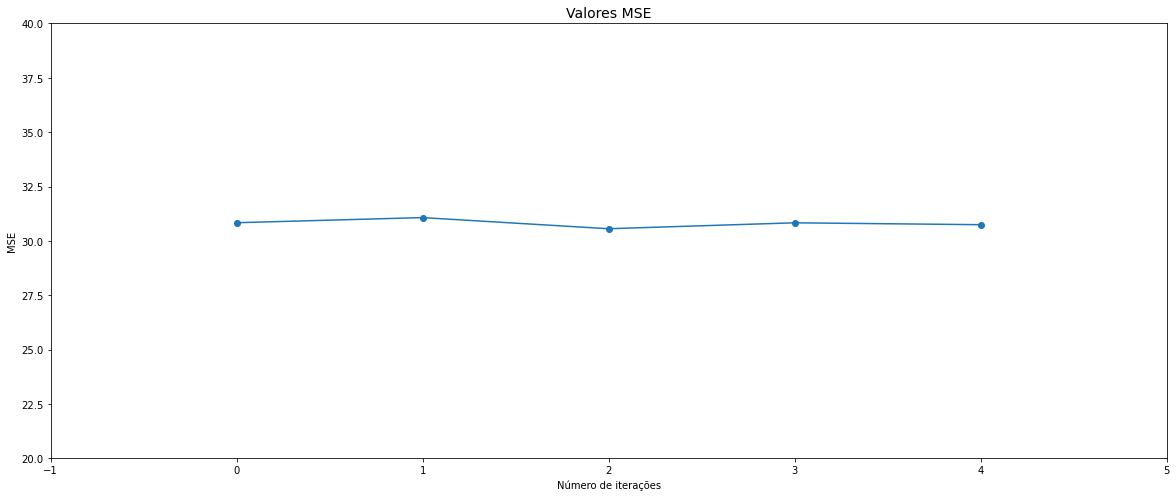

In [ ]:

funcao(x,0.15,200)

Media MSE:   37.889



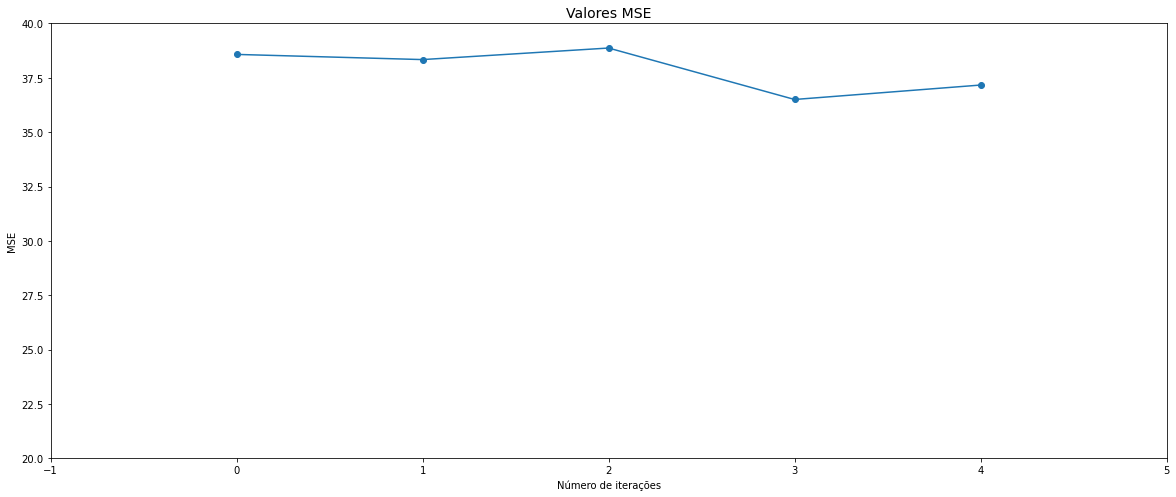

In [ ]:
funcao(x,0.15,10)

Media MSE:   31.067



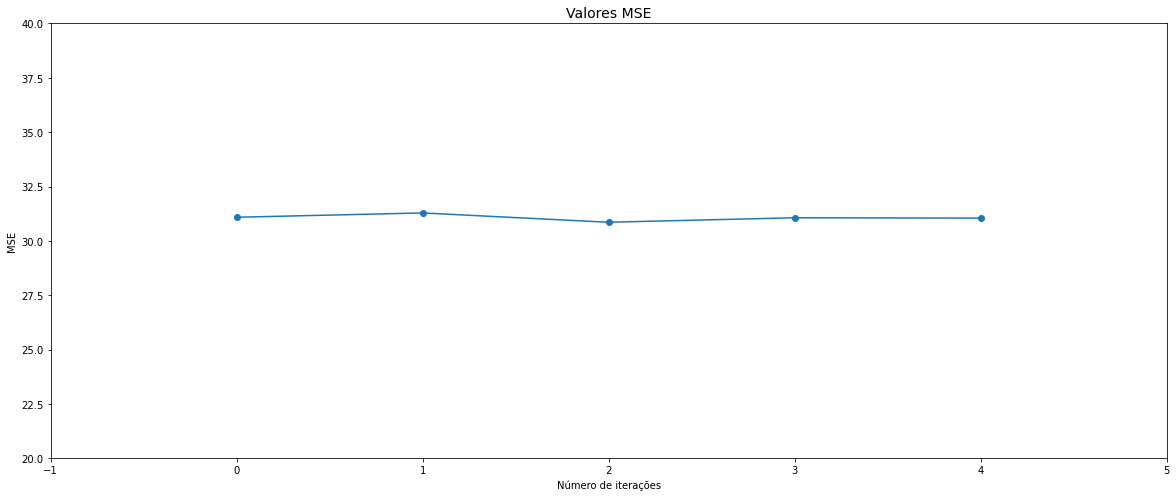

In [ ]:
funcao(x,0.15,100)

Media MSE:   37.018



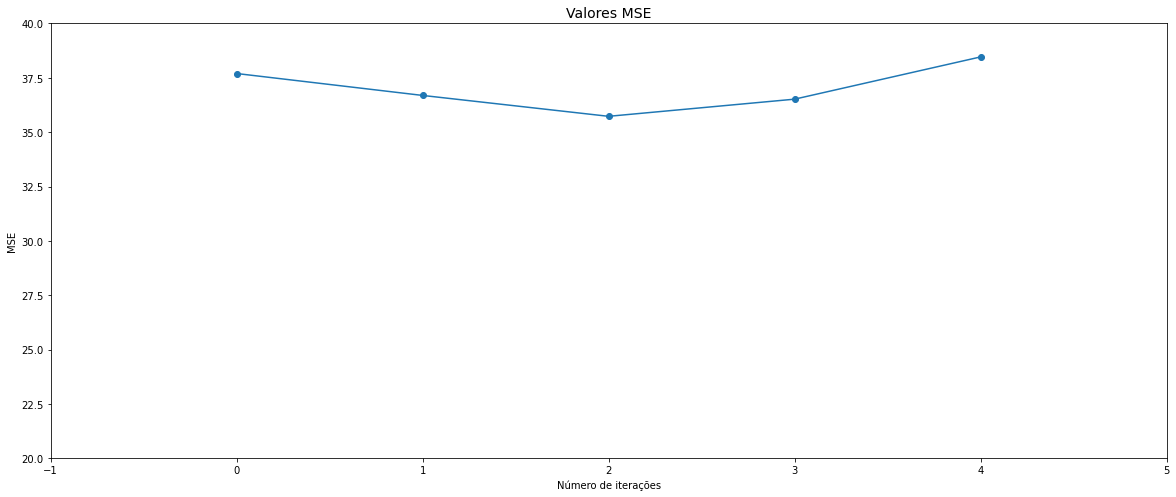

In [ ]:
funcao(x,0.20,10)

Media MSE:   30.878



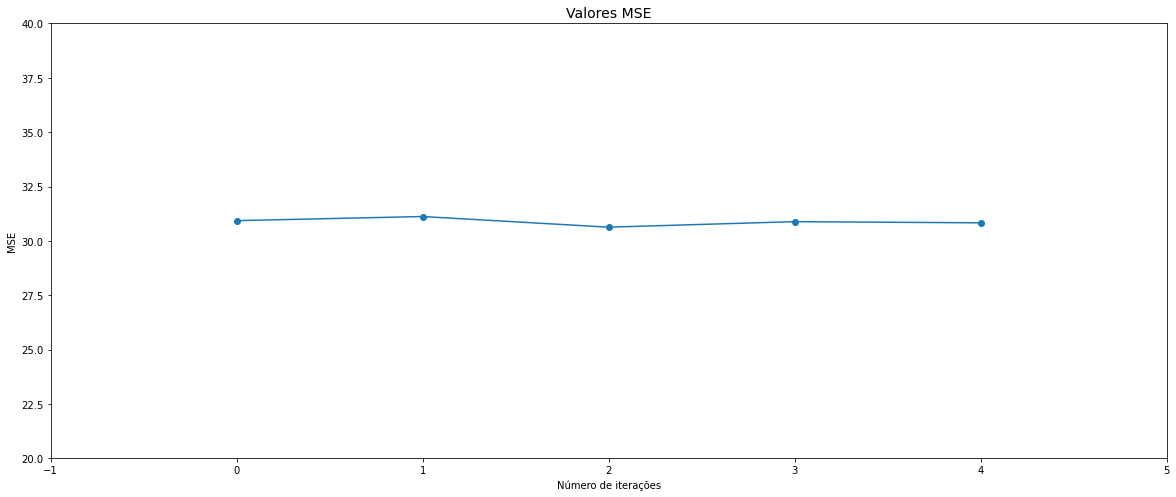

In [ ]:
funcao(x,0.20,100)

Media MSE:   30.797



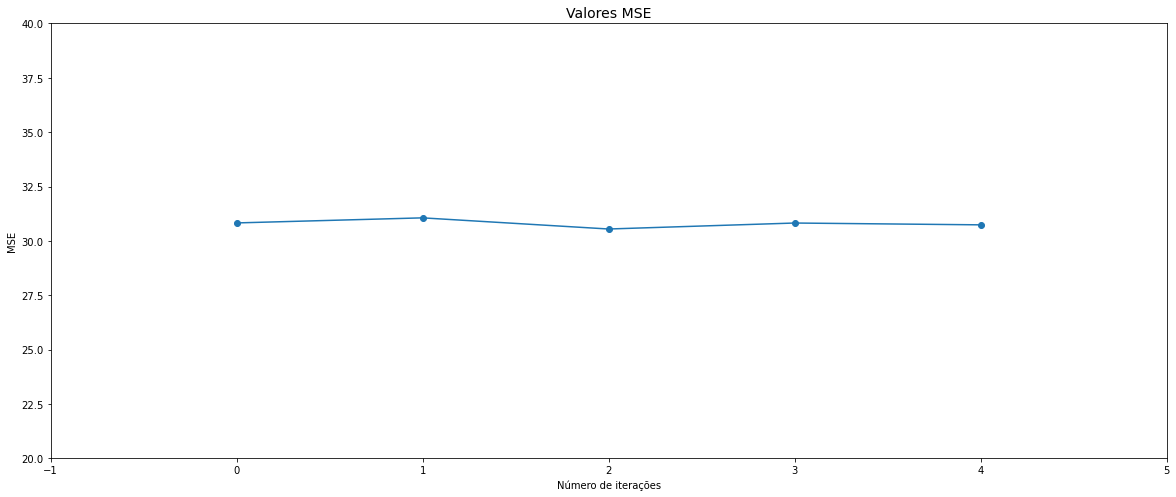

In [ ]:
funcao(x,0.2,200)

Media MSE:   30.989



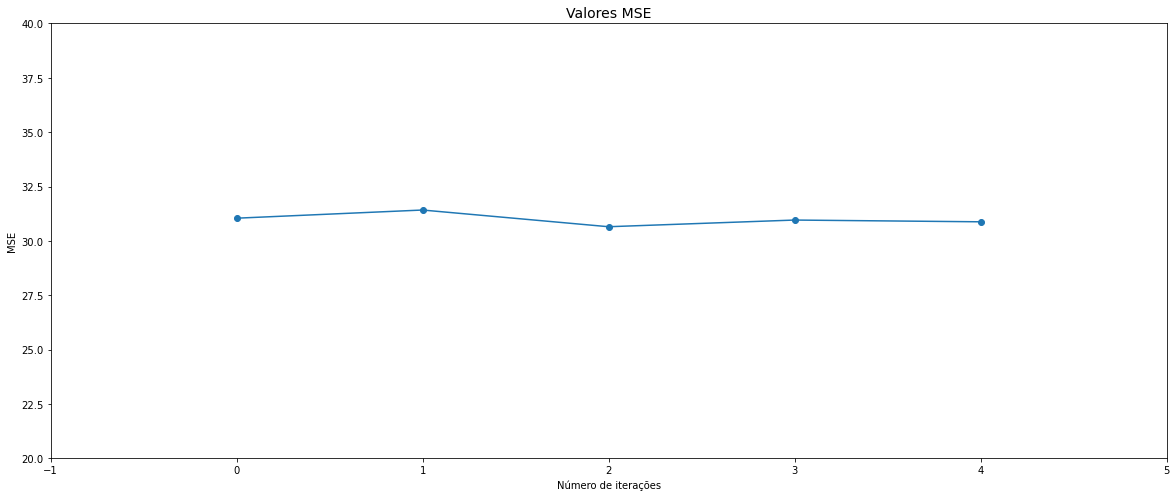

In [ ]:
funcao(x,0.3,100)

Media MSE:   30.796



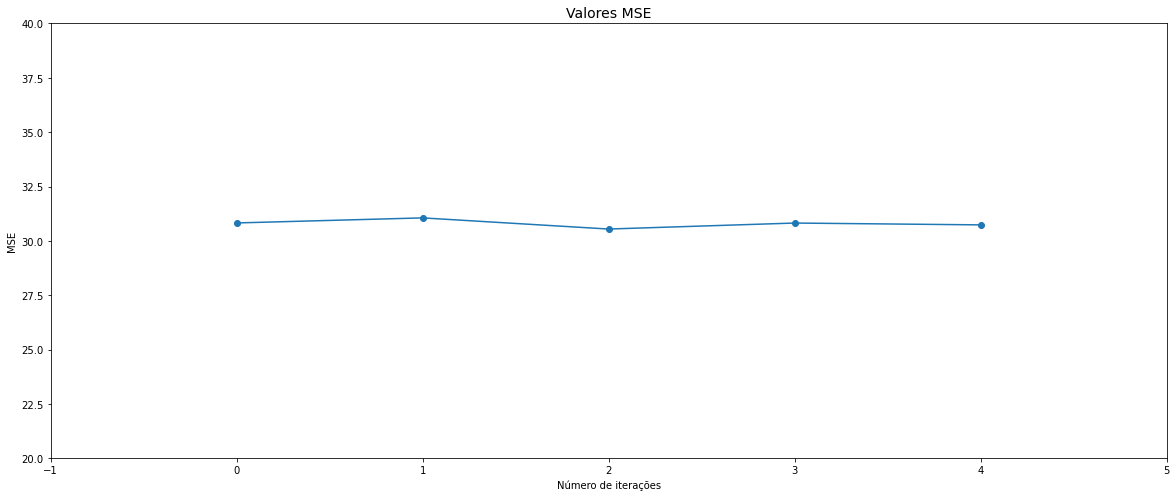

In [ ]:
funcao(x,0.3,200)

Media MSE:   30.888



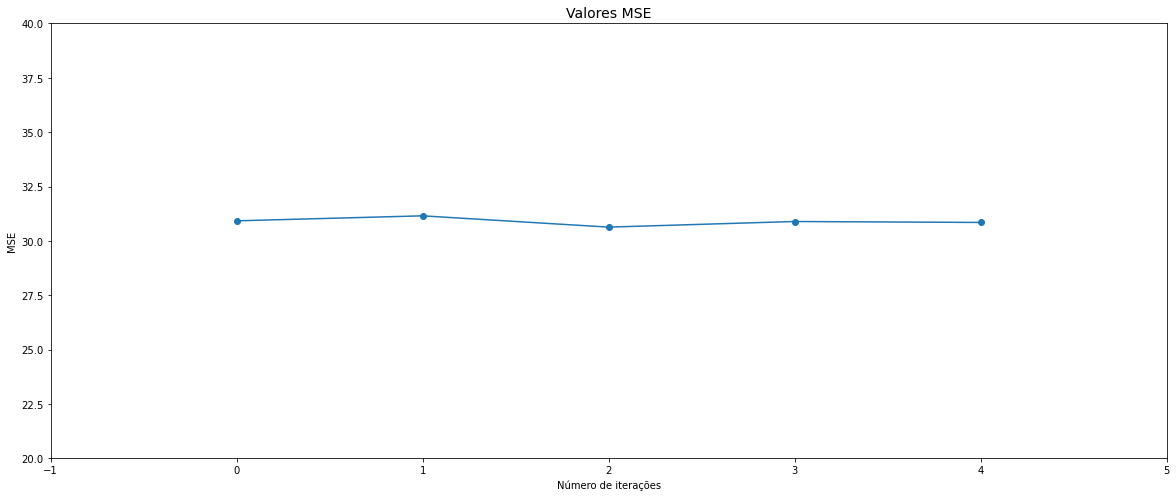

In [ ]:
funcao(x,0.1,200)

Media MSE:   31.523



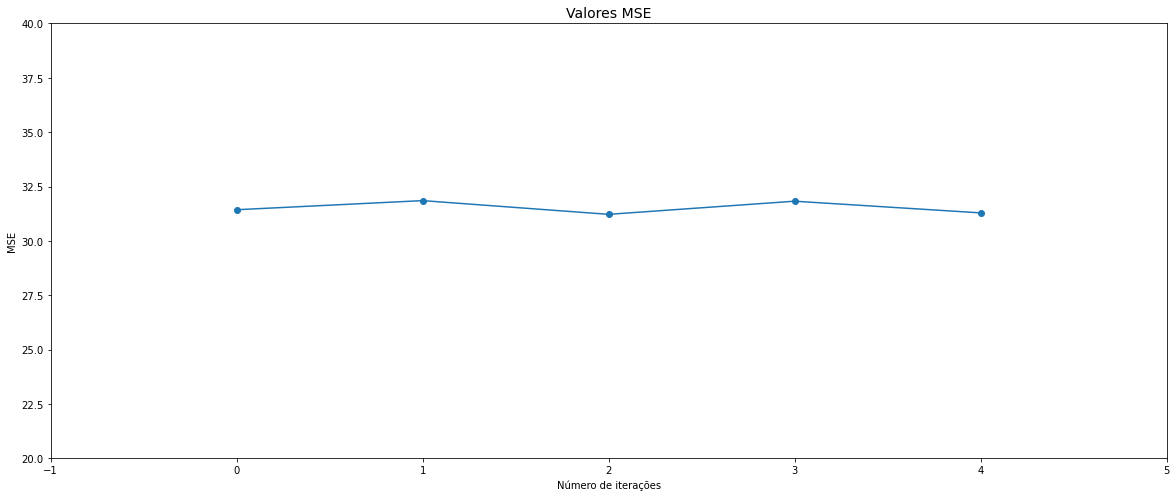

In [ ]:
funcao(x,0.05,200)

# Ao final dos teste consegui identificar que os melhores parametros foram uma taxa de aprendizado de 0.2 com 200 passos apresentado um MSE médio de 30.795


```

```


---



In [ ]:
from  sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ypred=lr.predict(x)
mse=mean_squared_error(y,ypred)

print(mse)

30.803038341320473


## Vimos que o valor do Mse da regressão linear do sklearn foi bem próximo do valor encontrado acima, o que comprova a escolha dos parâmetros.

## EX 1.2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
lista=[0.07,0.08,0.09,0.1,0.12,0.13,0.14,0.15]
for i in lista:
  lista1=[]
  for train_idx,test_idx in kf.split(x):
    xtreino=x[train_idx]
    xteste=x[test_idx]
    ytreino=y[train_idx]
    yteste=y[test_idx]

    pol=PolynomialFeatures(degree=2,include_bias=False)
    xpol=pol.fit_transform(xtreino)

    lin_reg=regLinear(i,1000)
    lin_reg.fit(xpol,ytreino)
    lista1.append(mean_squared_error(ytreino,lin_reg.predict(xpol)))
  print("Media MSE com learning  rate  = ",i ,"\n" ,   round(np.mean(lista1),3))
  print()
  

Media MSE com learning  rate  =  0.07 
 28.361

Media MSE com learning  rate  =  0.08 
 28.17

Media MSE com learning  rate  =  0.09 
 27.949

Media MSE com learning  rate  =  0.1 
 27.816

Media MSE com learning  rate  =  0.12 
 27.502

Media MSE com learning  rate  =  0.13 
 27.365

Media MSE com learning  rate  =  0.14 
 27.329

Media MSE com learning  rate  =  0.15 
 1.6631523488241871e+53



### Com o teste acima determinamos que a melhor learning rate se trata de 0.14, a partir disso realizarei outro loop alterando o número de passos.

In [ ]:
step=[250,500,1000,1500,2000,5000]
for s in step:
  lista1=[]
  for train_idx,test_idx in kf.split(x):
    xtreino=x[train_idx]
    xteste=x[test_idx]
    ytreino=y[train_idx]
    yteste=y[test_idx]

    pol=PolynomialFeatures(degree=2,include_bias=False)
    xpol=pol.fit_transform(xtreino)

    lin_reg=regLinear(0.14,s)
    lin_reg.fit(xpol,ytreino)
    lista1.append(mean_squared_error(ytreino,lin_reg.predict(xpol)))
  print("Media MSE com numeros de passos  = ",s ,"\n" ,   round(np.mean(lista1),3))
  print()

Media MSE com numeros de passos  =  250 
 29.463

Media MSE com numeros de passos  =  500 
 28.3

Media MSE com numeros de passos  =  1000 
 27.286

Media MSE com numeros de passos  =  1500 
 26.906

Media MSE com numeros de passos  =  2000 
 26.747

Media MSE com numeros de passos  =  5000 
 26.633



### Vimos que com  5000 passos encontramos um Mse bem baixo, porém, irei escolher 2000 passos como parâmetro,pois não houve diferença significativa com o valor encontrado em 5000 passos.

### Portanto os parâmetros selecionados para regressão polinomial de grau 2 sera de 0.14 a taxa de aprendizado e 2000 passos.

In [ ]:
lr_pol=LinearRegression()

In [ ]:
xpol1=pol.fit_transform(x)

In [ ]:
lr_pol.fit(xpol1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
mse_pol=mean_squared_error(y,lr_pol.predict(xpol1))

In [ ]:
print(mse_pol)

26.647199970652746


### Considerando o Mse da regressão do sklearn, vemos que ficou bem próximo do valor selecionado anteriormente, agora iremos instanciar a regularização.

In [ ]:
from sklearn.linear_model import Ridge,Lasso

In [ ]:
## Regularização Ridge

alpha=[0.01,0.1,1,10,100]
for a in alpha:
  lista1=[]
  for train_idx,test_idx in kf.split(x):
    xtreino=x[train_idx]
    xteste=x[test_idx]
    ytreino=y[train_idx]
    yteste=y[test_idx]

    pol=PolynomialFeatures(degree=2,include_bias=False)
    xpol=pol.fit_transform(xtreino)

    ridge=Ridge(alpha=a)
    ridge.fit(xpol,ytreino)
    lista1.append(mean_squared_error(ytreino,ridge.predict(xpol)))
  print("Media MSE com alpha   = ",a ,"\n" ,   round(np.mean(lista1),3))
  print()

Media MSE com alpha   =  0.01 
 26.632

Media MSE com alpha   =  0.1 
 26.632

Media MSE com alpha   =  1 
 26.638

Media MSE com alpha   =  10 
 26.957

Media MSE com alpha   =  100 
 29.423



In [ ]:
## Regularização Lasso

alpha=[0.01,0.1,1,10,100]
for a in alpha:
  lista1=[]
  for train_idx,test_idx in kf.split(x):
    xtreino=x[train_idx]
    xteste=x[test_idx]
    ytreino=y[train_idx]
    yteste=y[test_idx]

    pol=PolynomialFeatures(degree=2,include_bias=False)
    xpol=pol.fit_transform(xtreino)

    lasso=Lasso(alpha=a)
    lasso.fit(xpol,ytreino)
    lista1.append(mean_squared_error(ytreino,lasso.predict(xpol)))
  print("Media MSE com alpha   = ",a ,"\n" ,   round(np.mean(lista1),3))
  print()

Media MSE com alpha   =  0.01 
 26.878

Media MSE com alpha   =  0.1 
 31.17

Media MSE com alpha   =  1 
 49.186

Media MSE com alpha   =  10 
 49.186

Media MSE com alpha   =  100 
 49.186



## Com a regularização é posssível constatar a melhor eficiência da regularização Ridge, apresentando um erro menor com alpha = 0.1





## EX 2.1

In [ ]:
def getData2():
    X, y = make_classification(n_classes=2, n_features=5, n_samples=10000, random_state = 0)
    return X, y

In [ ]:
def logLossCost(ytrue, ypred_probs):
    return (ytrue * np.log(ypred_probs) + (1 - ytrue) * np.log(1 - ypred_probs)).mean() * -1

In [ ]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

In [ ]:
class regLog():

    
    def __init__(self, learning_rate, num_steps,limiar):
        self.learning_rate = learning_rate
        self.num_steps = num_steps
        self.limiar=limiar
        
    def fit(self, X, y):
      y=y.reshape(-1,1)
      m=X.shape[0]
      k=X.shape[1]
      X_b=np.c_[np.ones((m,1)),X]
      theta=np.random.randn(k+1,1)
      for step in range(self.num_steps):
        yscore=sigmoid(X_b.dot(theta))
        gradient=X_b.T.dot(yscore-y)
        theta=theta-self.learning_rate*gradient
      self.theta_final=theta  


    
     


        
    def predict_proba(self, X):
      m=X.shape[0]
      x_b=np.c_[np.ones((m,1)),X] 

      probs = sigmoid(x_b.dot(self.theta_final))
      
      return probs.reshape(-1,)

    def predict(self,X):
      m=X.shape[0]
      x_b=np.c_[np.ones((m,1)),X] 

      probs = sigmoid(x_b.dot(self.theta_final))
      ypred= np.where(probs>self.limiar,1,0)
      return ypred


In [ ]:
x1,y1=getData2()

In [ ]:
rl=regLog(0.01,1000,0.5)

In [ ]:
rl.fit(x1,y1)

In [ ]:
rl.predict_proba(x1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


array([7.73436461e-018, 6.50949228e-077, 1.00000000e+000, ...,
       4.13977108e-248, 0.00000000e+000, 1.28036318e-222])

In [ ]:
ypred=rl.predict(x1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [ ]:
from  sklearn.metrics import confusion_matrix

In [ ]:
ypred=np.where(rl.predict_proba(x1)>0.5,1,0)
cf=confusion_matrix(y1,ypred)

In [ ]:
print(cf)

[[4184  810]
 [ 975 4031]]


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logi=LogisticRegression()

In [ ]:
logi.fit(x1,y1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y12=logi.predict(x1)

In [ ]:
cf1=confusion_matrix(y1,y12)

In [ ]:
print(cf1)

[[4042  952]
 [ 785 4221]]


## Com a análise acima pude verificar a proxi,idade entre os valores da confusion matrix do modelo criado e do modelo de regressão do sk learn, o que mostra que o modelo trabalhou bem

In [ ]:
def func(x,y,v1,v2):
  lng_rate=[0.001,0.01,0.1,1]
  for l in lng_rate:
    reglog=regLog(l,v1,v2)
    reglog.fit(x,y)
    ypred=reglog.predict(x)
    cf=confusion_matrix(y,ypred)
    print(" Matriz de confusão para uma taxa de aprendizado de :",l )
  
    print(cf)
    print()

## testando os  dados variando a learnig rate

In [ ]:
func(x1,y1,1000,0.5)

 Matriz de confusão para uma taxa de aprendizado de : 0.001
[[4176  818]
 [1257 3749]]

 Matriz de confusão para uma taxa de aprendizado de : 0.01
[[4024  970]
 [ 777 4229]]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


 Matriz de confusão para uma taxa de aprendizado de : 0.1
[[4185  809]
 [ 979 4027]]

 Matriz de confusão para uma taxa de aprendizado de : 1
[[4065  929]
 [ 805 4201]]



## Com a análise acima pude verificar qua a taxa de aprendizado de 0.1 se comportou melhor nos dados, por isso utlizarei ela na variação do numero de passos abaixo

In [ ]:
def func1(x,y,v1,v2):
  num_steps=[100,500,1000,2000]
  for l in num_steps:
    reglog=regLog(v1,l,v2)
    reglog.fit(x,y)
    ypred=reglog.predict(x)
    cf=confusion_matrix(y,ypred)
    print(" Matriz de confusão para um número de passos de  :",l )
  
    print(cf)
    print()

In [ ]:
func1(x1,y1,0.1,0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


 Matriz de confusão para um número de passos de  : 100
[[4028  966]
 [ 775 4231]]

 Matriz de confusão para um número de passos de  : 500
[[4081  913]
 [ 824 4182]]

 Matriz de confusão para um número de passos de  : 1000
[[4166  828]
 [ 959 4047]]

 Matriz de confusão para um número de passos de  : 2000
[[2876 2118]
 [1177 3829]]



## Após os testes pude verificar que com a taxa de 0.1 e número de passos = 1000 , apresentaram os melhores resultados.